# 1. Data preparation:
 Download heart dataset from following link.
 https://www.kaggle.com/zhaoyingzhu/heartcsv
 Perform following operation on given dataset.

In [2]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv("Heart.csv")
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


a) Find Shape of Data

In [4]:
df.shape

(303, 15)

b) Find Missing Values

In [5]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [6]:
df.isnull().sum().sum()

6

c) Find data type of each column

In [7]:
df.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object

d) Finding out Zero's

In [8]:
(df == 0).sum()

Unnamed: 0      0
Age             0
Sex            97
ChestPain       0
RestBP          0
Chol            0
Fbs           258
RestECG       151
MaxHR           0
ExAng         204
Oldpeak        99
Slope           0
Ca            176
Thal            0
AHD             0
dtype: int64

e) Find Mean age of patients

In [9]:
df.Age.mean()

54.43894389438944

f) Now extract only Age, Sex, ChestPain, RestBP, Chol. Randomly divide dataset in training
(75%) and testing (25%).

In [10]:
x = df[['Age','Sex','ChestPain','RestBP','Chol']]
x

,Age,Sex,ChestPain,RestBP,Chol
0,63,1,typical,145,233
1,67,1,asymptomatic,160,286
2,67,1,asymptomatic,120,229
3,37,1,nonanginal,130,250
4,41,0,nontypical,130,204
...,...,...,...,...,...
298,45,1,typical,110,264
299,68,1,asymptomatic,144,193
300,57,1,asymptomatic,130,131
301,57,0,nontypical,130,236


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x, df, train_size = 0.75)
xtrain

,Age,Sex,ChestPain,RestBP,Chol
141,59,1,typical,170,288
101,34,1,typical,118,182
114,62,0,nonanginal,130,263
87,53,0,nonanginal,128,216
182,42,1,typical,148,244
...,...,...,...,...,...
140,59,1,nontypical,140,221
40,65,0,asymptomatic,150,225
46,51,1,nonanginal,110,175
76,60,1,asymptomatic,125,258


In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x, df,test_size = 0.25)
xtest

,Age,Sex,ChestPain,RestBP,Chol
99,48,1,asymptomatic,122,222
296,59,1,asymptomatic,164,176
289,56,1,nontypical,120,240
144,58,1,nonanginal,105,240
1,67,1,asymptomatic,160,286
...,...,...,...,...,...
100,45,1,asymptomatic,115,260
175,57,1,asymptomatic,152,274
125,45,0,nontypical,130,234
60,51,0,asymptomatic,130,305


In [14]:
import matplotlib.pyplot as plt

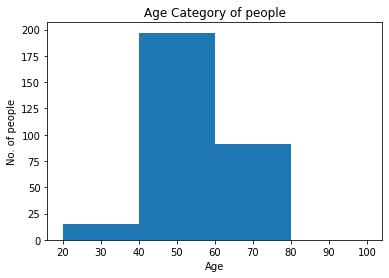

In [15]:
plt.hist(df.Age, bins=[20,40,60,80,100])
plt.title("Age Category of people")
plt.xlabel("Age")
plt.ylabel("No. of people")
plt.show()

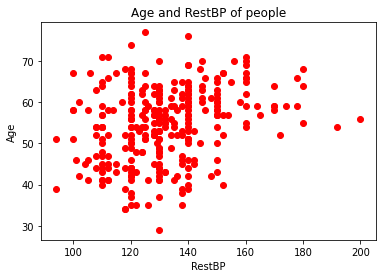

In [16]:
plt.scatter(df.RestBP, df.Age, color = 'red')
plt.title("Age and RestBP of people")
plt.xlabel("RestBP")
plt.ylabel("Age")
plt.show()

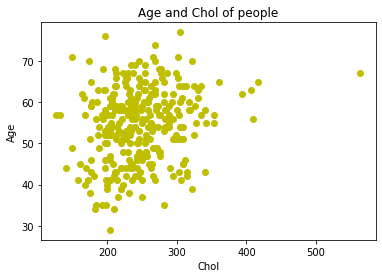

In [17]:
plt.scatter(df.Chol, df.Age, color = 'y')
plt.title("Age and Chol of people")
plt.xlabel("Chol")
plt.ylabel("Age")
plt.show()

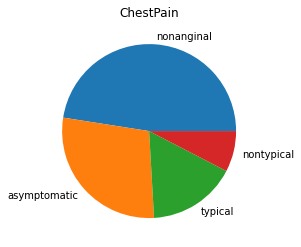

In [26]:
count = np.array(df.ChestPain.value_counts())
plt.pie(count, labels = ['nonanginal','asymptomatic','typical','nontypical'])
plt.title("ChestPain")
plt.show()

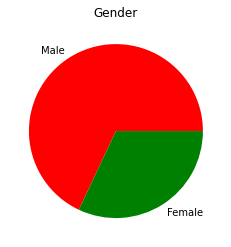

In [173]:
count = np.array(df.Sex.value_counts())
plt.title("Gender")
plt.pie(count, labels = ['Male', 'Female'], colors = ['r', 'g'])
plt.show()

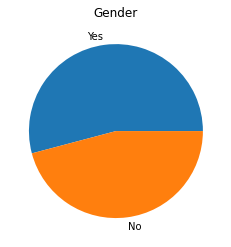

In [172]:
count = np.array(df.AHD.value_counts())
plt.title("Gender")
plt.pie(count, labels = ['Yes', 'No'])
plt.show()

Through the diagnosis test I predicted 100 report as COVID positive, but only 45 of those were actually positive. Total 50 people in my sample were actually COVID positive. I have total 500
samples.

 Create confusion matrix based on above data and find 

I. Accuracy

II. Precision

III. Recall

IV. F-1 score

In [37]:
TP = 45; FP = 55 #100
FN = 5; TN = 395 #400
#    50      450  500

acc = (TP + TN)/500
pre = (TP)/(TP + FP)
rec = (TP)/(TP + FN)

f1  = 2*pre*rec/(pre + rec)

In [40]:
print("Accuracy  : ",acc)
print("Precision : ", pre)
print("Recall    : ", rec)
print("F1-score  : ", f1)

Accuracy  :  0.88
Precision :  0.45
Recall    :  0.9
F1-score  :  0.6
